In [1]:
#-*- coding: utf-8 -*-
# author : Takuro Yamazaki
# description : 全員の行動だけが観測可能な場合

import os
from collections import OrderedDict

"""simulation world"""
from world import synchro_world_public

"""network"""
from networks import network_utils

"""agent"""
# defaultはこの4種類にしよう
from agent import Q_Learning_Agent as ql
from agent import Actor_Critic_Agent as aca

"""payoff matrix"""
from world.payoff_matrix import *

graph_prefix = "../src/networks/"

all_p = [0, 0.2, 0.4, 0.8, 1]

# graphの定義
cG = network_utils.graph_generator.complete_graph
pcG = network_utils.graph_generator.powerlaw_cluster_graph


all_graph = OrderedDict((("powerlaw_cluster",pcG), ("complete",cG),
                         ("multiple_clustered",graph_prefix+"multiple_clustered.gpickle"),
                         ("inner_dence_clustered", graph_prefix+"inner_dence_clustered.gpickle"),
                         ("one_dim_regular", graph_prefix+"onedim_regular.gpickle")))

W = synchro_world_public.synchro_world_public(100, 1000, [2, -2, 2, 2], graph_prefix+"inner_dence_clustered.gpickle", ql.Q_Learning_Agent, share_rate=0.5)
W.run()

  0%|          | 0/1000 [00:00<?, ?it/s]/home/yamazaki/project/Reinforcement_Learning/research/src/world/synchro_world_public.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.history[n][i] = self.G.node[n]["action"]
/home/yamazaki/.pyenv/versions/3.5.2/lib/python3.5/site-packages/pandas/core/indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 1000/1000 [02:36<00:00,  6.61it/s]


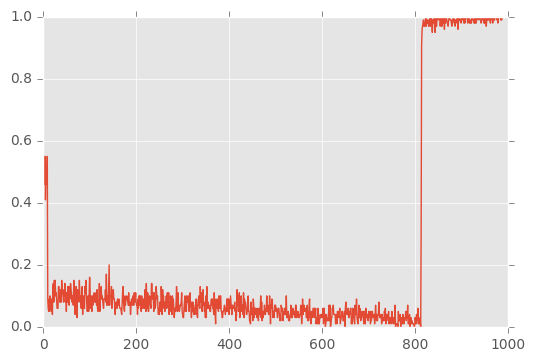

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.plot(np.arange(1000), W.coop_per_df[0])
plt.ylim((0, 1.0))
plt.show()

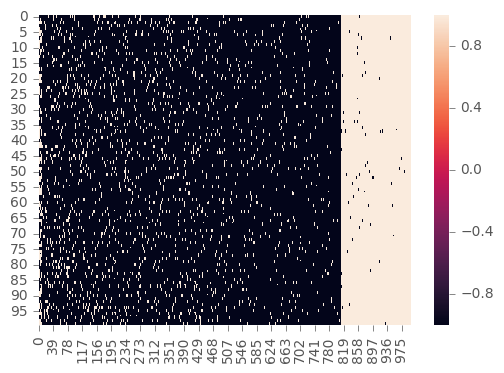

In [3]:
sns.heatmap(W.history.replace("c", 1).replace("d", -1).T)

In [4]:
W.agent_q_df

,0,1
0,437.006592,91.122364
1,437.010146,91.122364
2,437.289581,91.122364
3,437.011334,91.122364
4,437.007775,91.122368
5,437.004233,91.122364
6,437.000708,91.122364
7,437.507131,91.122364
8,437.010146,91.122364
9,437.007775,91.122364
